In [54]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.patches as mpatches
import math
import matplotlib.lines as mlines
import os
import cv2 as cv
from IPython.display import Video
import matplotlib.cm as cm
import matplotlib.animation as animation
import matplotlib.image as mpimg
from matplotlib.pyplot import figure

In [55]:
angle_step = 45;
angle_start = 0;
angle_stop = 180;
angles = list(range(angle_start,angle_stop+angle_step,angle_step));
numangles = len(angles)
imgs = np.zeros([numangles,3,256,320])
std_imgs = np.zeros([numangles,3,256,320])
temps = np.zeros(numangles)

for i in range(numangles):
    for j in range(3): ##three runs
        with h5py.File('C:\\Users\\khart\\Documents\\IRCSP2_data\\Regolith\\Highlands\\sifted\\0degAOI\\run'+ str(j + 1) + '\\' + str(angles[j]) + 'deg.h5', "r") as f:
            # List all groups
            #print(f.keys())

            # Get the data
            imgs[i,j,:,:] = np.mean(np.array(f[list(f.keys())[0]]),axis=0)
            std_imgs[i,j,:,:] = np.array(f[list(f.keys())[1]])
            temps[i] = np.array(f[list(f.keys())[2]])

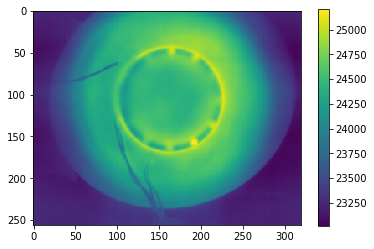

In [62]:
plt.imshow(imgs[0,0,:,:])
plt.colorbar()

In [57]:
## define ROI

ymin = 55
ymax = 175
xmin = 100
xmax = 210

In [63]:
deg0 = imgs[0,:,:,:]  
deg45 = imgs[1,:,:,:]
deg90 = imgs[2,:,:,:]  
deg135 = imgs[3,:,:,:]  

stokes0 =(deg0 + deg90 + deg45 + deg135)/2
stokes1 = deg0 - deg90
stokes2 = deg45 - deg135

DOLP = np.sqrt(((stokes1)**2)+((stokes2)**2))/(stokes0)
AOLP = np.arctan2(stokes2,stokes1)/2

In [64]:
np.shape(DOLP) 

(3, 256, 320)

Text(0.5, 1.0, 'Sifted Highlands')

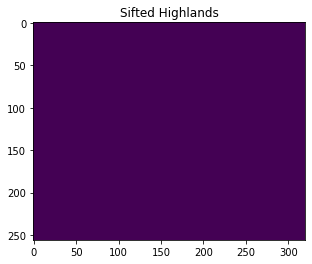

In [75]:
## plot DOLP at run 1
plt.imshow(stokes1[0])
plt.title('Sifted Highlands')

In [61]:
std_deg0 = std_imgs[0,:,ymin:ymax,xmin:xmax]
std_deg45 = std_imgs[1,:,ymin:ymax,xmin:xmax]
std_deg90 = std_imgs[2,:,ymin:ymax,xmin:xmax]
std_deg135 = std_imgs[3,:,ymin:ymax,xmin:xmax]

std_stokes0 = np.sqrt(std_deg0**2 + std_deg90**2)
std_stokes1 = std_stokes0
std_stokes2 = np.sqrt(std_deg45**2 + std_deg135**2)

dDOLP_dstokes1 = stokes1/(stokes0*np.sqrt(stokes1**2 + stokes2**2))
dDOLP_dstokes2 = stokes2/(stokes0*np.sqrt(stokes1**2 + stokes2**2))
dDOLP_dstokes0 = (-2*np.sqrt(stokes1**2+stokes2**2))/(stokes0**3)

dAOLP_dstokes2 = (stokes1)/(2*stokes1**2+stokes2**2)
dAOLP_dstokes1 = (-stokes2)/(2*stokes1**2+stokes2**2)

std_DOLP = np.sqrt(dDOLP_dstokes1**2*std_stokes1**2 + dDOLP_dstokes2**2*std_stokes2**2 + dDOLP_dstokes0**2*std_stokes0**2)
std_AOLP = np.sqrt(dAOLP_dstokes1**2*std_stokes1**2 + dAOLP_dstokes2**2*std_stokes2**2)


C:\Users\khart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\khart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\khart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\khart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


Text(0, 0.5, 'AOLP [°]')

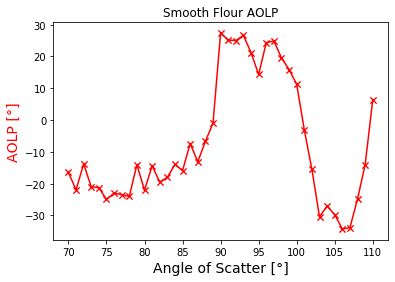

In [11]:
plt.plot(AOI, AOLPs*(180/np.pi), color="red", marker="x")
for i in range(len(AOLP)):
    plt.errorbar(AOI[i], AOLPs[i]*(180/np.pi), color='red',yerr=error_AOLP[i],fmt ='x')
plt.title('Smooth Flour AOLP')
plt.xlabel("Angle of Scatter [\N{DEGREE SIGN}]",fontsize=14)
plt.ylabel("AOLP [\N{DEGREE SIGN}]",color="red",fontsize=14)

Text(0, 0.5, 'DOLP [%]')

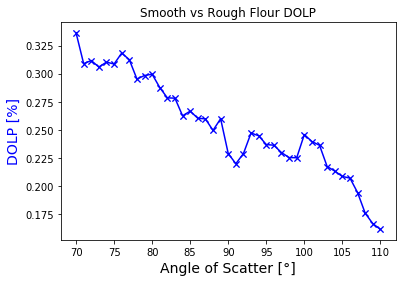

In [12]:
plt.plot(AOI, DOLPs_1*100, color="blue", marker="x")
for i in range(len(DOLP_1)):
    plt.errorbar(AOI[i], DOLPs_1[i]*100, color='blue',yerr=error_DOLP_1[i],fmt ='x')
plt.title('Smooth vs Rough Flour DOLP')
plt.xlabel("Angle of Scatter [\N{DEGREE SIGN}]",fontsize=14)
plt.ylabel("DOLP [%]",color="blue",fontsize=14)

In [ ]:
img = imgs

filenames = []
for i in range(num_AOI):
    for j in range(numangles):
        plt.imshow(imgs[i,j,:,:])
        plt.title('Heated Smooth Highland Dust, AOI at '+ str(AOI[i]) +  '\N{DEGREE SIGN}, LP at ' + str(angles[j]) +'\N{DEGREE SIGN}')
        plt.colorbar()
        plt.clim(22500,27000)
        filename = 'img'+str(i)+str(j)+'.png'
        filenames.append(filename)
        plt.savefig(filename)
        plt.close()

frames = [] # for storing the generated images
fig = plt.figure(figsize=(20, 20))
plt.axis("off")
for i in range(len(filenames)):
    frames.append([plt.imshow(mpimg.imread(filenames[i]),animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,repeat_delay=1000)

ani.save('C:\\Users\\khart\\Documents\\IRCSP2_data\\Jaclyn\\ARTEMIS_test_samples\\SmoothHighland\\heatedimageanimation.gif', writer='PillowWriter', fps=.5)

for filename in set(filenames):
    os.remove(filename)

In [14]:
AOI_start = 70;
AOI_stop = 110;
step = 1;
AOI = list(range(AOI_start,AOI_stop+step,step))
num_AOI = len(AOI);
angle_step = 45;
angle_start = 0;
angle_stop = 135;
angles = list(range(angle_start,angle_stop+angle_step,angle_step));
numangles = len(angles)
imgs = np.zeros([num_AOI,numangles,256,320])
std_imgs = np.zeros([num_AOI,numangles,256,320])
temps = np.zeros(num_AOI)

for i in range(num_AOI):
    for j in range(numangles):
        with h5py.File('C:\\Users\\khart\\Documents\\IRCSP2_data\\Jaclyn\\ARTEMIS_test_samples\\RoughHighland\\Heated75degC_AOI_' + str(AOI[i]) + '\\' + str(angles[j]) + 'deg.h5', "r") as f:
            # List all groups
            #print(f.keys())
    
            # Get the data
            imgs[i,j,:,:] = np.array(f[list(f.keys())[0]])
            std_imgs[i,j,:,:] = np.array(f[list(f.keys())[1]])
            temps[i] = np.array(f[list(f.keys())[2]])

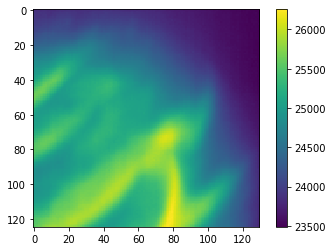

In [15]:
plt.imshow(imgs[20,3,ymin:ymax,xmin:xmax])
plt.colorbar()

In [16]:
ymin = 50
ymax = 175
xmin = 100
xmax = 230

In [17]:
deg0 = imgs[:,0,ymin:ymax,xmin:xmax]  - np.mean(darkfield[0])
deg45 = imgs[:,1,ymin:ymax,xmin:xmax]  - np.mean(darkfield[1])
deg90 = imgs[:,2,ymin:ymax,xmin:xmax]  - np.mean(darkfield[2])
deg135 = imgs[:,3,ymin:ymax,xmin:xmax]  - np.mean(darkfield[3])

stokes0 = deg0 + deg90
stokes1 = deg0 - deg90
stokes2 = deg45 - deg135

DOLP_2 = np.sqrt(((stokes1)**2)+((stokes2)**2))/(stokes0)
AOLP = np.arctan2(stokes2,stokes1)/2

In [18]:
std_deg0 = np.sqrt(std_imgs[:,0,ymin:ymax,xmin:xmax]**2 + std_darkfield[:,0,ymin:ymax,xmin:xmax]**2)
std_deg45 = np.sqrt(std_imgs[:,1,ymin:ymax,xmin:xmax]**2 + std_darkfield[:,1,ymin:ymax,xmin:xmax]**2)
std_deg90 = np.sqrt(std_imgs[:,2,ymin:ymax,xmin:xmax]**2 + std_darkfield[:,2,ymin:ymax,xmin:xmax]**2)
std_deg135 = np.sqrt(std_imgs[:,3,ymin:ymax,xmin:xmax]**2 + std_darkfield[:,3,ymin:ymax,xmin:xmax]**2)

std_stokes0 = np.sqrt(std_deg0**2 + std_deg90**2)
std_stokes1 = std_stokes0
std_stokes2 = np.sqrt(std_deg45**2 + std_deg135**2)

dDOLP_dstokes1 = stokes1/(stokes0*np.sqrt(stokes1**2 + stokes2**2))
dDOLP_dstokes2 = stokes2/(stokes0*np.sqrt(stokes1**2 + stokes2**2))
dDOLP_dstokes0 = (-2*np.sqrt(stokes1**2+stokes2**2))/(stokes0**3)

dAOLP_dstokes2 = (stokes1)/(2*stokes1**2+stokes2**2)
dAOLP_dstokes1 = (-stokes2)/(2*stokes1**2+stokes2**2)

std_DOLP = np.sqrt(dDOLP_dstokes1**2*std_stokes1**2 + dDOLP_dstokes2**2*std_stokes2**2 + dDOLP_dstokes0**2*std_stokes0**2)
std_AOLP = np.sqrt(dAOLP_dstokes1**2*std_stokes1**2 + dAOLP_dstokes2**2*std_stokes2**2)

error_DOLP_2 = np.zeros(len(DOLP_2))
for i in range(len(DOLP_2)):
    error_DOLP_2[i] = np.mean(std_DOLP[i,ymin:ymax,xmin:xmax])

error_AOLP = np.zeros(len(AOLP))
for i in range(len(AOLP)):
    error_AOLP[i] = np.mean(std_AOLP[i,ymin:ymax,xmin:xmax])

C:\Users\khart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\khart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\khart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\khart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [19]:
DOLPs_2 = np.zeros(num_AOI)
for i in range(num_AOI):
    DOLPs_2[i] = np.mean(DOLP_2[i,ymin:ymax,xmin:xmax])
AOLPs = np.zeros(num_AOI)
for j in range(num_AOI):
    AOLPs[j] = np.mean(AOLP[j,ymin:ymax,xmin:xmax])

Text(0, 0.5, 'DOLP [%]')

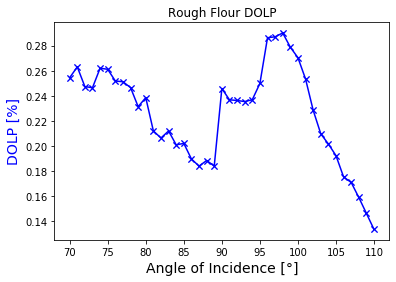

In [20]:
plt.plot(AOI, DOLPs_2*100, color="blue", marker="x")
for i in range(len(DOLP_2)):
    plt.errorbar(AOI[i], DOLPs_2[i]*100, color='blue',yerr=error_DOLP_2[i],fmt ='x')
plt.title('Rough Flour DOLP')
plt.xlabel("Angle of Incidence [\N{DEGREE SIGN}]",fontsize=14)
plt.ylabel("DOLP [%]",color="blue",fontsize=14)

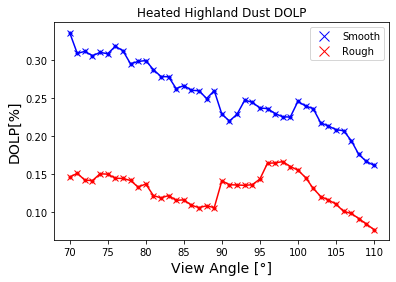

In [23]:
blue_star = mlines.Line2D([], [], marker='x', linestyle='None',
                          markersize=10,color = 'blue', label='Smooth')
red_star = mlines.Line2D([], [], marker='x', linestyle='None',
                          markersize=10,color = 'red',label='Rough')


plt.title('Heated Highland Dust DOLP')
plt.legend(handles=[blue_star, red_star])
plt.plot(AOI, DOLPs_1*100, color="blue", marker=".")
for i in range(len(DOLP_1)):
    plt.errorbar(AOI[i], DOLPs_1[i]*100, color='blue',yerr=error_DOLP_1[i],fmt ='x')
plt.xlabel("View Angle [\N{DEGREE SIGN}]",fontsize=14)
plt.ylabel("DOLP[%]",fontsize=14)
plt.plot(AOI, DOLPs_2*(180/np.pi),color="red",marker=".")
for i in range(len(AOLP)):
    plt.errorbar(AOI[i], DOLPs_2[i]*(180/np.pi), color='red',yerr=error_DOLP_2[i],fmt ='x')
plt.show()

MovieWriter PillowWriter unavailable; using Pillow instead.


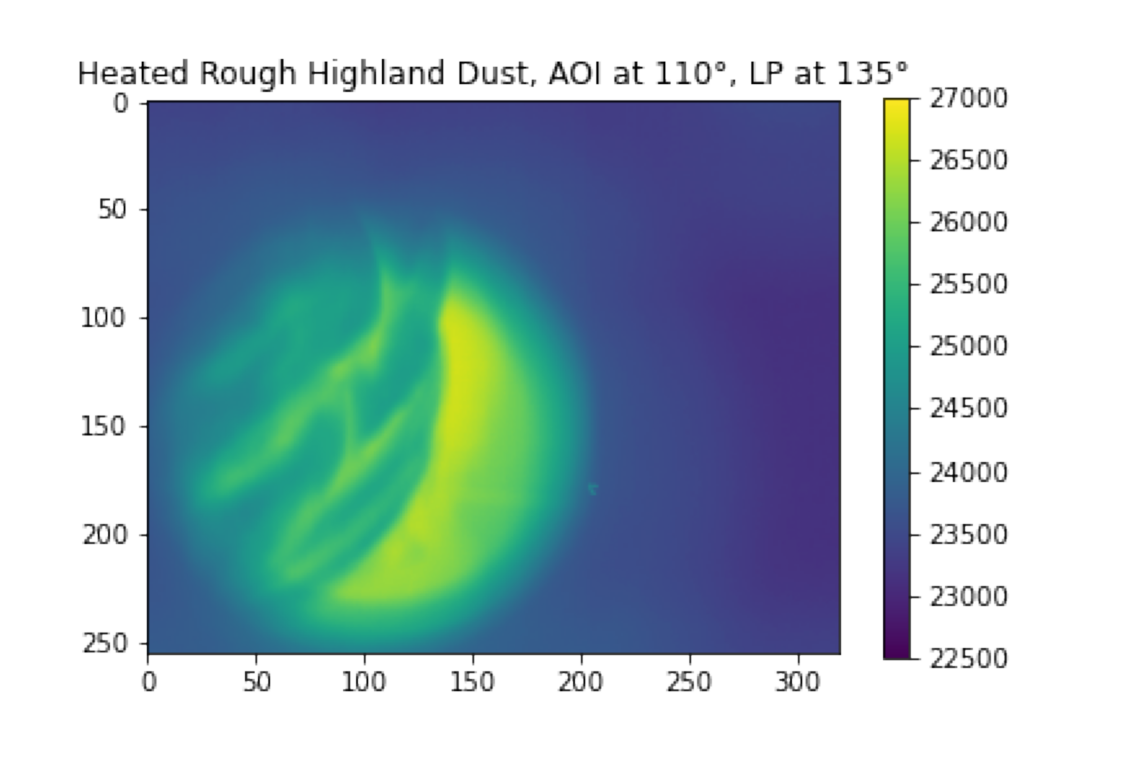

In [124]:
img = imgs

filenames = []
for i in range(num_AOI):
    for j in range(numangles):
        plt.imshow(imgs[i,j,:,:])
        plt.title('Heated Rough Highland Dust, AOI at '+ str(AOI[i]) +  '\N{DEGREE SIGN}, LP at ' + str(angles[j]) +'\N{DEGREE SIGN}')
        plt.colorbar()
        plt.clim(22500,27000)
        filename = 'img'+str(i)+str(j)+'.png'
        filenames.append(filename)
        plt.savefig(filename)
        plt.close()

frames = [] # for storing the generated images
fig = plt.figure(figsize=(20, 20))
plt.axis("off")
for i in range(len(filenames)):
    frames.append([plt.imshow(mpimg.imread(filenames[i]),animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,repeat_delay=1000)

ani.save('C:\\Users\\khart\\Documents\\IRCSP2_data\\Jaclyn\\ARTEMIS_test_samples\\RoughHighland\\heatedimageanimation.gif', writer='PillowWriter', fps=.5)

for filename in set(filenames):
    os.remove(filename)